In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns


Задание 1

Вернемся к набору данных о видеоиграх.

Ответьте на следующие вопросы:

1) Как критики относятся к спортивным играм?

2) Критикам нравятся больше игры на PC или на PS4?

3) Критикам больше нравятся стрелялки или стратегии?

Для каждого вопроса:

    сформулируйте нулевую и альтернативную гипотезы;
    выберите пороговый уровень статистической значимости;
    опишите полученные результаты статистического теста.



In [ ]:
game = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/stat_case_study/vgsales.csv')
game

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Как критики относятся к спортивным играм?
sport = game.loc[game['Genre'] == 'Sports']
sport['Critic_Score'].mean()

71.96817420435511

H0: Средняя оценка критиков по играм в жанре спорт <= 75

H1: Средняя оценка критиков по играм в жанре спорт соствляет более 75

alpha 0.05%

In [ ]:
!pip install --upgrade scipy

In [ ]:
alpha = 0.05

result = stats.ttest_1samp(sport.dropna()['Critic_Score'], 75, alternative='greater')
print(result)

if result.pvalue < alpha:
  print('Отвергаем нулевую гипотезу, среднее больше 75 (игры нравятся)')
else:
  print('Не отвергаем нулевую гипотезу, среднее больше 75 (игры не нравятся)')

Ttest_1sampResult(statistic=-1.931002961890315, pvalue=0.9731087624294885)
Не отвергаем нулевую гипотезу, среднее больше 75 (игры не нравятся)


In [ ]:
# Критикам нравятся больше игры на PC или на PS4?
pc = game.loc[game['Platform'] == 'PC']
ps4 = game.loc[game['Platform'] == 'PS4']
print(pc['Critic_Score'].mean(), ps4['Critic_Score'].mean())

75.92867132867133 72.09126984126983


H0: Критики одинаково оценивают игры на PC и PS4

H1: Оценки критиков отличаются на игры на PC и PS4

alpha 0.05%

In [ ]:
result = stats.ttest_ind(pc.dropna()['Critic_Score'], ps4.dropna()['Critic_Score'], equal_var=False)
alpha = 0.05
print(result.pvalue)

if result.pvalue < alpha:
  print('Отвергаем нулевую гипотезу, оценки отличаются')
else:
  print('Не отвергаем нулевую гипотезу, критики одинаково оценивают игры на 2-х платформах')

7.984874894502312e-05
Отвергаем нулевую гипотезу, оценки отличаются


<Figure size 1080x720 with 0 Axes>

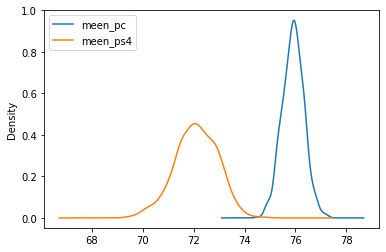

In [ ]:
# Проверим почему так получилось на графиках

plt.figure(figsize=(15, 10))

pc_boost = []
ps4_boost = []
for i in range(1000):
    pc_ = pc['Critic_Score'].sample(frac=1, replace=True).mean()
    pc_boost.append(pc_)
    ps4_ = ps4['Critic_Score'].sample(frac=1, replace=True).mean()
    ps4_boost.append(ps4_)

# Преобразование списка в DataFrame
boot_1d = {'meen_pc': pc_boost, 'meen_ps4': ps4_boost}

boot_1d = pd.DataFrame(boot_1d)

boot_1d.plot(kind='density')

Действительно критики по разному оценивают игры на pc и ps4

Для PC значения выше и кучнее

In [ ]:
# Критикам больше нравятся стрелялки или стратегии?


In [ ]:
shooter = game.loc[game['Genre'] == 'Shooter']
strategy = game.loc[game['Genre'] == 'Strategy']

H0: Критики одинаково оценивают игры жанра шутер и стратегии

H1: Оценки критиков отличаются 

alpha 0.05%

In [ ]:
result = stats.ttest_ind(shooter.dropna()['Critic_Score'], strategy.dropna()['Critic_Score'], equal_var=False)
alpha = 0.05
print(result.pvalue)

if result.pvalue < alpha:
  print('Отвергаем нулевую гипотезу, оценки отличаются')
else:
  print('Не отвергаем нулевую гипотезу, критики одинаково оценивают игры на 2-х платформах')

0.012619857894976985
Отвергаем нулевую гипотезу, оценки отличаются


<Figure size 1080x720 with 0 Axes>

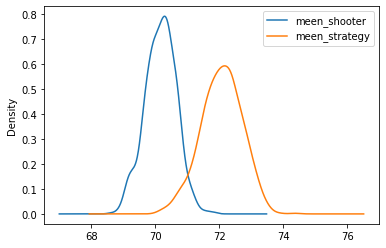

In [ ]:
# Проверим почему так получилось на графиках

plt.figure(figsize=(15, 10))

shooter_boost = []
strategy_boost = []
for i in range(1000):
    shooter_ = shooter['Critic_Score'].sample(frac=1, replace=True).mean()
    shooter_boost.append(shooter_)
    strategy_ = strategy['Critic_Score'].sample(frac=1, replace=True).mean()
    strategy_boost.append(strategy_)

# Преобразование списка в DataFrame
boot_1d = {'meen_shooter': shooter_boost, 'meen_strategy': strategy_boost}

boot_1d = pd.DataFrame(boot_1d)

boot_1d.plot(kind='density')

Действительно критикам более нравятся стратегии


Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные здесь) по признаку спама. Для этого:

1) Привидите весь текст к нижнему регистру;

2) Удалите мусорные символы;

3) Удалите стоп-слова;

4) Привидите все слова к нормальной форме;

5) Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

tfidf_matrix = tfidf.fit_transform(df.Message)

names = tfidf.get_feature_names()

tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)

6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите random_state=42. Используйте train_test_split;

7) Постройте модель логистической регрессии, укажите random_state=42, оцените ее точность на тестовых данных;

8) Опишите результаты при помощи confusion_matrix;

9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/stat_case_study/spam.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
# Приводим текст в столбце к нижнему регистру
df['Message'] = df['Message'].str.lower()

In [ ]:
# Удаляем все мусорные символы из текста
df['Message'].replace('[\W_]+', ' ', regex=True, inplace=True)

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_set = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def drop_stop_words(message, sw_set):
  result = [msg for msg in message.split() if msg not in sw_set]
  return ' '.join(result)

In [ ]:
# Убираем стоп слова
df['Message'] = df['Message'].apply(drop_stop_words, sw_set=stopwords_set)

In [ ]:
# Приведение слова к нормальной форме
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('wordnet')
wl = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
def lemma_words(message):
  result = [wl.lemmatize(word) for word in message.split()]
  return ' '.join(result)

In [ ]:
df['Message'] = df['Message'].apply(lemma_words)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
def tfidf_vectors(df):
  tfidf = TfidfVectorizer()
  tfidf_matrix = tfidf.fit_transform(df.Message)
  names = tfidf.get_feature_names_out()
  tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
  return tfidf_matrix

In [ ]:
df = pd.concat([df, tfidf_vectors(df)], axis=1)
df

,Category,Message,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,ham,go jurong point crazy available bugis n great ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ham,ok lar joking wif u oni,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ham,u dun say early hor u c already say,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ham,nah think go usf life around though,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,spam,2nd time tried 2 contact u u 750 pound prize 2...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,ham,ü b going esplanade fr home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,ham,pity mood suggestion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,ham,guy bitching acted like interested buying some...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Удаляем ненужную колонку с изначальными сообщениями
df = df.drop(['Message'], axis=1)

In [ ]:
# Проверим есть ли пропуски в столбце категорий
df.Category.isna().sum()

0

In [ ]:
def check_spam(category):
  if category == 'ham':
    return 0
  else:
    return 1

In [ ]:
df['Category'] = df['Category'].apply(check_spam)
df

,Category,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df['Category'], test_size=0.30, random_state=42)

In [ ]:
LR = LogisticRegression()

In [ ]:
LR.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = LR.predict(X_test)

In [ ]:
score = LR.score(X_test, y_test)
score

0.958732057416268

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1445,    3],
       [  66,  158]])

Получается, что:

True positiv (правильное предсказание): 1445

False positiv (лохно положительное предсказание): 3

False negativ (ложно отрицательное предсказание): 66

True negativ (истинно отрицательное предсказание): 158

In [ ]:
result = pd.DataFrame(y_test)
result.rename(columns={'Category': 'Test category'}, inplace=True)
result

,Test category
3245,0
944,0
1044,0
2484,0
812,0
...,...
2505,0
2525,1
4975,0
650,1


In [ ]:
result['Predict category'] = y_pred
result

,Test category,Predict category
3245,0,0
944,0,0
1044,0,0
2484,0,0
812,0,0
...,...,...
2505,0,0
2525,1,1
4975,0,0
650,1,1


In [ ]:
result = result.loc[result['Test category'] != result['Predict category']]
result

,Test category,Predict category
2952,0,1
881,1,0
1961,1,0
3864,1,0
2575,1,0
...,...,...
4543,1,0
752,1,0
309,1,0
495,0,1


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/stat_case_study/spam.csv')

In [ ]:
result = result.merge(df['Message'], how='left', left_index=True, right_index=True)
result

,Test category,Predict category,Message
2952,0,1,Hey now am free you can call me.
881,1,0,Reminder: You have not downloaded the content ...
1961,1,0,Guess what! Somebody you know secretly fancies...
3864,1,0,Oh my god! I've found your number again! I'm s...
2575,1,0,Your next amazing xxx PICSFREE1 video will be ...
...,...,...,...
4543,1,0,FreeMsg Hi baby wow just got a new cam moby. W...
752,1,0,You have an important customer service announc...
309,1,0,TheMob> Check out our newest selection of cont...
495,0,1,Are you free now?can i call now?


In [ ]:
def change_category(test_c):
  if test_c == 0:
    return 'ham'
  else:
    return 'spam'

In [ ]:
result['Predict category'] = result['Predict category'].apply(change_category)
result['Test category'] = result['Test category'].apply(change_category)
result

,Test category,Predict category,Message
2952,ham,spam,Hey now am free you can call me.
881,spam,spam,Reminder: You have not downloaded the content ...
1961,spam,spam,Guess what! Somebody you know secretly fancies...
3864,spam,spam,Oh my god! I've found your number again! I'm s...
2575,spam,spam,Your next amazing xxx PICSFREE1 video will be ...
...,...,...,...
4543,spam,spam,FreeMsg Hi baby wow just got a new cam moby. W...
752,spam,spam,You have an important customer service announc...
309,spam,spam,TheMob> Check out our newest selection of cont...
495,ham,spam,Are you free now?can i call now?


В результате получаем 69 неверно предсказанных значений.